In [1]:
from model import CNN, shallow_CNN, deep_CNN
from pathlib import Path
import torchaudio
import numpy as np
import torch
import matplotlib.pyplot as plt


In [2]:
music_file_path = Path('/home/siyuan/class/cmsc734/sound_vis/music-genre-classification/test.mp3')
model_path = Path('/home/siyuan/class/cmsc734/sound_vis/music-genre-classification/my_work/best_model.ckpt')

if not music_file_path.exists():
    raise ValueError('Music file does not exist')
if not model_path.exists():
    raise ValueError('Model file does not exist')


In [3]:
def adjust_audio_length(wav, num_samples, num_chunks):
    hop = (len(wav) - num_samples) // num_chunks
    wav = np.array([wav[i * hop : i * hop + num_samples] for i in range(num_chunks)])
    return wav

In [4]:
num_sec= 30
num_samples = 22050 * num_sec  # 2 seconds
num_chunks = 60


net = CNN()
net.load_state_dict(torch.load(model_path))

waveform, sr = torchaudio.load(music_file_path)  
waveform = waveform.mean(dim=0)  # Convert to mono by averaging the channels  

wav = waveform.squeeze().numpy()
# adjust audio length
wav_chunks = adjust_audio_length(wav,num_samples=num_samples, num_chunks=num_chunks ).astype('float32')
wav_chunks = torch.from_numpy(wav_chunks).unsqueeze(0)


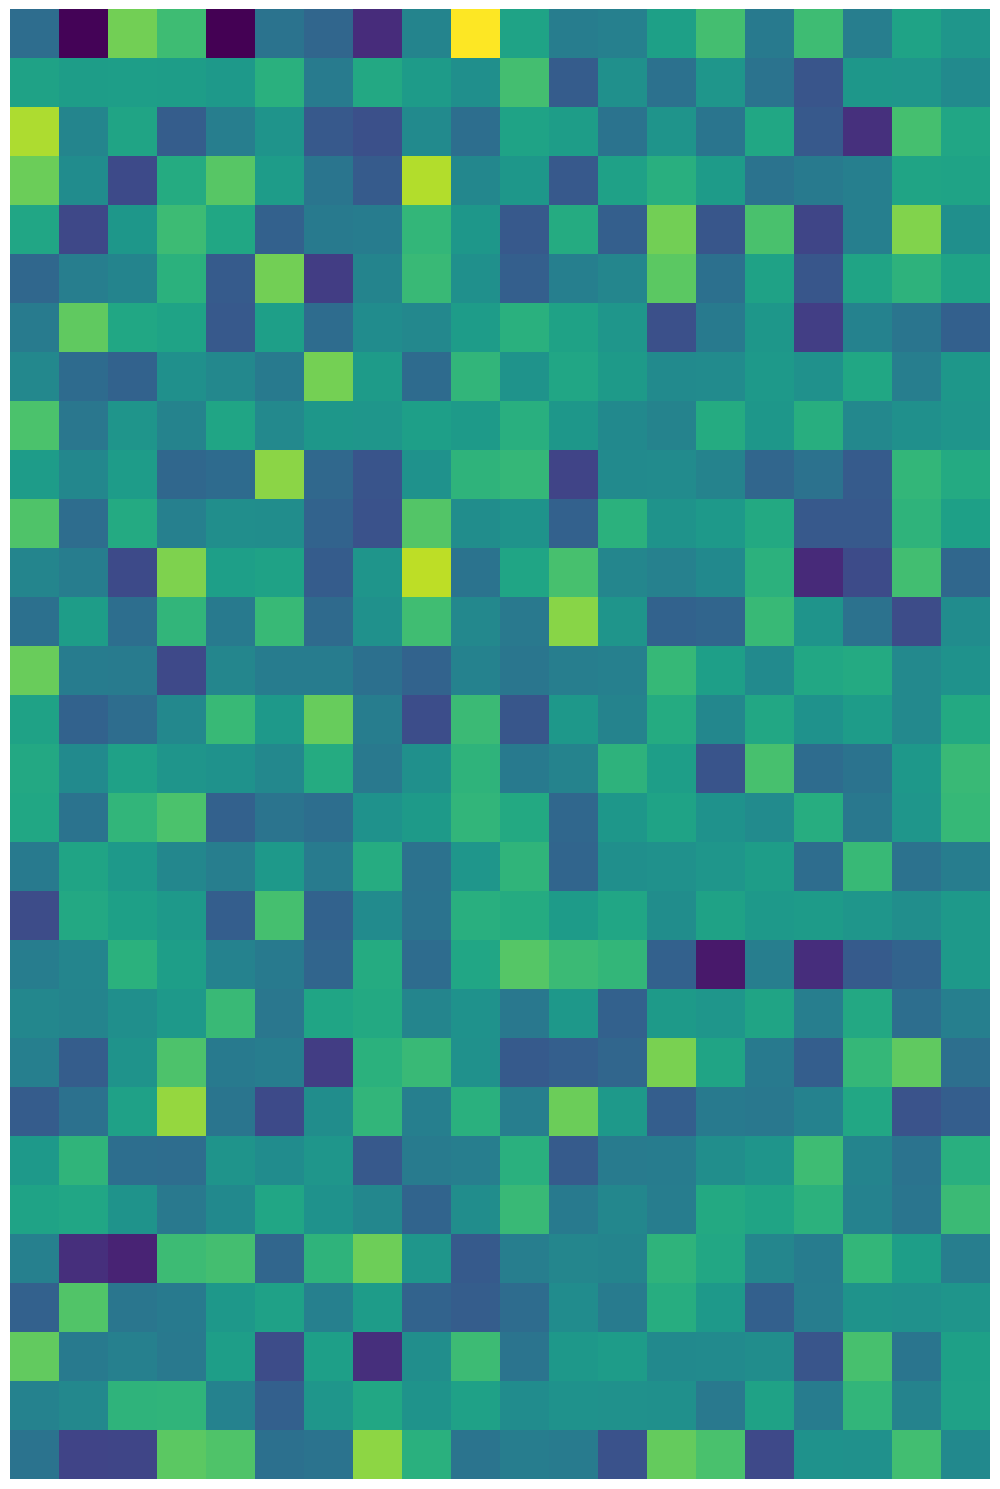

In [5]:
for i, data in enumerate(wav_chunks):
    output = net(data)
    feature_maps = output.detach().numpy()
    feature_maps = np.reshape(feature_maps, (30, 20)) 
    # plot feature map
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(feature_maps, cmap='viridis')
    ax.axis('off')
    
    
    plt.tight_layout()  
    plt.show()  
    break

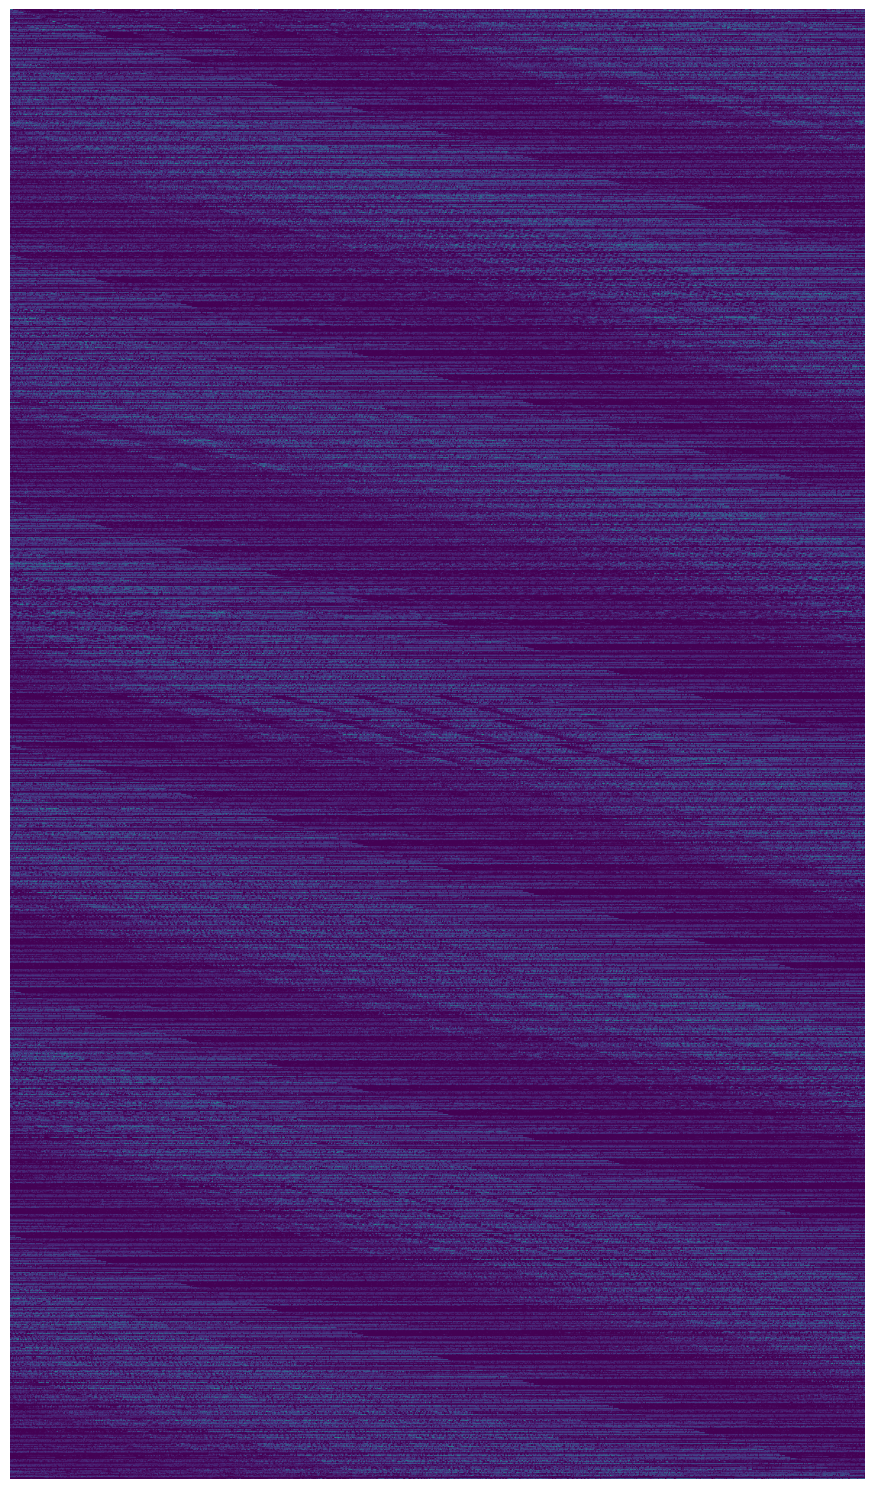

In [9]:
num_sec= 30
num_samples = 22050 * num_sec  # 2 seconds
num_chunks = 60


net = shallow_CNN()
net.load_state_dict(torch.load(model_path))

waveform, sr = torchaudio.load(music_file_path)  
waveform = waveform.mean(dim=0)  # Convert to mono by averaging the channels  

wav = waveform.squeeze().numpy()
# adjust audio length
wav_chunks = adjust_audio_length(wav,num_samples=num_samples, num_chunks=num_chunks ).astype('float32')
wav_chunks = torch.from_numpy(wav_chunks).unsqueeze(0)
for i, data in enumerate(wav_chunks):
    output = net(data)
    feature_maps = output.detach().numpy().flatten()
    feature_maps = np.reshape(feature_maps, (1926,1120)) 
    # plot feature map
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(feature_maps, cmap='viridis')
    ax.axis('off')
    
    
    plt.tight_layout()  
    plt.show()  
    break